# 토픽모델링(Topic Modeling)
- 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 

## 잠재 디레클레 할당 (Latenet Dirichlet Allocation, LDA)
- 토픽모델링 : 문서의 집합에서 토픽을 찾아내는 프로세스 
- ex) 검색, 엔진, 고객 민원시스템 등과 같이 문서의 주제를 알아내는 일이 중요한곳에서 사용됨. 
- LDA의 문서들은 토픽들의 혼합으로 구성되어있으며 토픽들은 확률분포에 기반하여 단어들을 생성함
- 데이터가 주어지면 LDA는 문서가 생성되던 과정을 역추적함. 

### 1. 잠재 디레클레 할당 개요 
- LDA는 토픽의 제목을 정해주진 않지만 
- 알고리즘의 사용자는 결과로부터 각각의 토픽이 무엇에 대한 토픽이라고 판단 가능함

### 2. LDA의 가정 
- LDA는 단어의 순서 신경쓰지 않음


### 3. LDA 수행하기 
- 1) 알고리즘에게 토픽의 개수 k를 알려줌
- 2) 모든단어를 k중 하나의 토픽에 할당함 
- 3) 모든 문서의 모든 단어에 대해 아래 과정 반복
- 3-1) 각 단어 w는 자신은 잘못된 토픽에 할당되어있지만 다른 모든 단어들은 전부 올바른
- 토픽에 할당되어있다고 가정함. 
- => 이에따라 단어 w는 두가지 기준에 따라 토픽을 '재할당'시킴
- 1. p(topic|document d): 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- 2. p(word w| topic t): 각 토픽들 t에서 해당 단어 w의 분포 
- 이를 반복하면 모든 할당이 완료된 수렴상태가 됨. 


### 4. 잠재 디리클레 할당과 잠재 의미 분석의 차이 
- LSA: DTM을 차원축소하여 축소차원에서 근접단어들을 토픽으로 묶음
- LDA: 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합함


### 5. 실습을 통한 이해 
- gensim을 사용함.. 
#### 1) 정수 인코딩과 단어집합 만들기 
- 20개의 다른 주제를 가진 뉴스데이터를 사용함.. 



In [ ]:
tokenized_doc[:5]

In [5]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

,date,전일비,clean_title
0,2022-01-24,-1.557902,"['tennis', 'where', 'is', 'peng', 'shuai', 'sh..."
1,2022-01-25,-4.786643,"['debt', 'dispute', 'probably', 'sparked', 'ki..."
2,2022-01-26,-0.292913,"['justice', 'breyer', 'fortified', 'abortion',..."
3,2022-01-27,-5.978427,"['search', 'halted', 'for', 'survivors', 'of',..."
4,2022-01-28,1.163178,"['senior', 'official', 'to', 'visit', 'lithuan..."
5,2022-02-03,1.143301,"['isis', 'leader', 'quraishi', 'kills', 'himse..."
6,2022-02-04,3.413554,"['want', 'north', 'korea', 'breakthrough', 'ch..."
7,2022-02-07,-0.660128,"['putin', 'says', 'some', 'of', 'macron', 'ide..."
8,2022-02-08,-4.064312,"['france', 'macron', 'calls', 'for', 'calm', '..."
9,2022-02-09,0.650807,"['missouri', 'texas', 'to', 'probe', 'gofundme..."


In [ ]:
print(dictionary[66])

In [ ]:
len(dictionary)

In [ ]:
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
print(ldamodel.print_topics())

In [ ]:
#시각화 

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
# 문서 별 토픽 분포 확인 

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

# 강사님코드

In [44]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [45]:
from gensim.corpora import Dictionary
text1 = [['man','female','man','human','man'],['woman','boy','human','man','woman']]

dictionary = Dictionary(text1)
for i in dictionary.items():
    print(i)

(0, 'female')
(1, 'human')
(2, 'man')
(3, 'boy')
(4, 'woman')


In [46]:
[dictionary.doc2bow(text) for text in text1]

[[(0, 1), (1, 1), (2, 3)], [(1, 1), (2, 1), (3, 1), (4, 2)]]

In [47]:
dictionary.doc2bow(['man','woman','boy','female','man','woman','man'])

[(0, 1), (2, 3), (3, 1), (4, 2)]

In [48]:
dictionary.doc2idx(['man','woman','boy','female','man','woman','man'])

[2, 4, 3, 0, 2, 4, 2]

In [49]:
tokenizer = RegexpTokenizer('[\w]+')

In [50]:
stop_words = stopwords.words('english')

In [51]:
p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run,  cars => car

In [52]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [53]:
# topics - keywords를 기준으로 keywords의 빈도(중요도)를 계산해서 문서의 유사도

# 1. health, 
# 2. food
# 3. bigdata
# 4. drive
# 5. data

In [54]:
p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run,  cars => car

In [55]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i,doc_j]

In [56]:
texts = []

In [57]:
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmer_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmer_tokens)

In [58]:
texts

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'brocolli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['2016

In [59]:
dictionary = corpora.Dictionary(texts)  # Dictionary : token에 index를 붙여서 사전을 만든다

In [60]:
for w in dictionary.items():
    print(w)

(0, 'brocolli')
(1, 'brother')
(2, 'eat')
(3, 'good')
(4, 'like')
(5, 'mother')
(6, 'around')
(7, 'basebal')
(8, 'drive')
(9, 'lot')
(10, 'practic')
(11, 'spend')
(12, 'time')
(13, 'blood')
(14, 'caus')
(15, 'expert')
(16, 'health')
(17, 'increas')
(18, 'may')
(19, 'pressur')
(20, 'suggest')
(21, 'tension')
(22, 'better')
(23, 'feel')
(24, 'never')
(25, 'often')
(26, 'perform')
(27, 'school')
(28, 'seem')
(29, 'well')
(30, 'profession')
(31, 'say')
(32, 'adequ')
(33, 'applic')
(34, 'big')
(35, 'complex')
(36, 'data')
(37, 'deal')
(38, 'larg')
(39, 'process')
(40, 'refer')
(41, 'set')
(42, 'softwar')
(43, 'term')
(44, 'tradit')
(45, 'use')
(46, 'case')
(47, 'discoveri')
(48, 'fals')
(49, 'greater')
(50, 'higher')
(51, 'lead')
(52, 'mani')
(53, 'offer')
(54, 'power')
(55, 'rate')
(56, 'statist')
(57, 'associ')
(58, 'concept')
(59, 'key')
(60, 'origin')
(61, 'three')
(62, 'varieti')
(63, 'veloc')
(64, 'volum')
(65, '2016')
(66, 'analyt')
(67, 'asset')
(68, 'character')
(69, 'definit')
(70

In [61]:
dictionary.token2id

{'brocolli': 0,
 'brother': 1,
 'eat': 2,
 'good': 3,
 'like': 4,
 'mother': 5,
 'around': 6,
 'basebal': 7,
 'drive': 8,
 'lot': 9,
 'practic': 10,
 'spend': 11,
 'time': 12,
 'blood': 13,
 'caus': 14,
 'expert': 15,
 'health': 16,
 'increas': 17,
 'may': 18,
 'pressur': 19,
 'suggest': 20,
 'tension': 21,
 'better': 22,
 'feel': 23,
 'never': 24,
 'often': 25,
 'perform': 26,
 'school': 27,
 'seem': 28,
 'well': 29,
 'profession': 30,
 'say': 31,
 'adequ': 32,
 'applic': 33,
 'big': 34,
 'complex': 35,
 'data': 36,
 'deal': 37,
 'larg': 38,
 'process': 39,
 'refer': 40,
 'set': 41,
 'softwar': 42,
 'term': 43,
 'tradit': 44,
 'use': 45,
 'case': 46,
 'discoveri': 47,
 'fals': 48,
 'greater': 49,
 'higher': 50,
 'lead': 51,
 'mani': 52,
 'offer': 53,
 'power': 54,
 'rate': 55,
 'statist': 56,
 'associ': 57,
 'concept': 58,
 'key': 59,
 'origin': 60,
 'three': 61,
 'varieti': 62,
 'veloc': 63,
 'volum': 64,
 '2016': 65,
 'analyt': 66,
 'asset': 67,
 'character': 68,
 'definit': 69,
 'h

In [62]:
import numpy as np

In [63]:
print(texts[0])

['brocolli', 'good', 'eat', 'brother', 'like', 'eat', 'good', 'brocolli', 'mother']


In [64]:
print(np.unique(np.array(texts[0])))

['brocolli' 'brother' 'eat' 'good' 'like' 'mother']


In [65]:
dictionary.doc2bow(texts[0])  # token의 빈도를 tuple

[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)]

In [66]:
texts[1]

['mother',
 'spend',
 'lot',
 'time',
 'drive',
 'brother',
 'around',
 'basebal',
 'practic']

In [67]:
corpus = [dictionary.doc2bow(text) for text in texts]   # (token idx, frequency)
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

In [68]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary)

In [69]:
ldamodel.print_topics(num_words=7)  # topic별 중요 token

[(0,
  '0.068*"health" + 0.047*"drive" + 0.026*"mother" + 0.026*"pressur" + 0.026*"brother" + 0.026*"may" + 0.026*"lot"'),
 (1,
  '0.059*"data" + 0.035*"higher" + 0.033*"veloc" + 0.033*"volum" + 0.033*"big" + 0.031*"varieti" + 0.021*"concept"'),
 (2,
  '0.030*"mother" + 0.030*"drive" + 0.030*"brother" + 0.030*"seem" + 0.030*"pressur" + 0.030*"feel" + 0.030*"well"'),
 (3,
  '0.078*"data" + 0.042*"good" + 0.042*"brocolli" + 0.042*"eat" + 0.040*"process" + 0.024*"big" + 0.024*"brother"')]

In [70]:
ldamodel.get_document_topics(corpus)

In [71]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.025832806), (1, 0.025017586), (2, 0.025472917), (3, 0.92367667)]

In [72]:
ldamodel.get_document_topics(corpus)[2]

[(0, 0.931414), (1, 0.022842094), (2, 0.022995897), (3, 0.02274797)]

In [73]:
for d in ldamodel.get_document_topics(corpus):
    print(d)

[(0, 0.02582455), (1, 0.025017586), (2, 0.025472876), (3, 0.923685)]
[(0, 0.9241107), (1, 0.025022395), (2, 0.02553338), (3, 0.025333518)]
[(0, 0.93141454), (1, 0.022842081), (2, 0.022995383), (3, 0.022747967)]
[(0, 0.019741345), (1, 0.019246882), (2, 0.9416094), (3, 0.0194024)]
[(0, 0.8909574), (1, 0.035741877), (2, 0.035752557), (3, 0.03754818)]
[(0, 0.014725073), (1, 0.014998599), (2, 0.014777383), (3, 0.95549893)]
[(0, 0.014806288), (1, 0.95540696), (2, 0.014829709), (3, 0.014957035)]
[(0, 0.022754189), (1, 0.93130857), (2, 0.022902722), (3, 0.023034547)]
[(0, 0.011934887), (1, 0.9636686), (2, 0.01234857), (3, 0.012047951)]
[(0, 0.027984722), (1, 0.02813192), (2, 0.027936349), (3, 0.915947)]


In [74]:
# LDA Topic modeling : perplexity, coherence

# perplexity (혼란)
# 문헌 내 주제 출현확률과 주제 내 용어출현 확률

In [75]:
import matplotlib.pyplot as plt

In [76]:
from gensim.models import CoherenceModel

print(ldamodel.log_perplexity(corpus))

-5.039875822848287


In [77]:
perplexity_values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, \
                                               id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

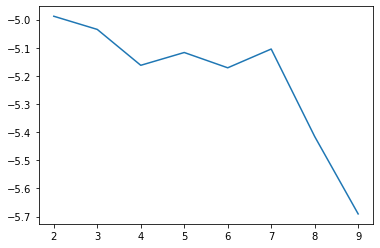

In [78]:
plt.plot(range(2,10), perplexity_values)